# Demo Spark en Cluster

Este demo utiliza los siguientes datos [New York City Taxi and Limousine Commission (TLC) Trip Record Data](https://aws.amazon.com/marketplace/pp/prodview-okyonroqg5b2u?sr=0-1&ref_=beagle&applicationId=AWSMPContessa#usage)

In [1]:
%%html
<style>
div.output_area pre {
    white-space: pre;
}
</style>

In [53]:
# Importar librerías
from pyspark.sql import SparkSession

# Importar funciones únicas
from pyspark.sql.functions import lit, col, desc, asc, countDistinct
from pyspark.sql.types import IntegerType,BooleanType,DateType

# Importar funciones con un alias, que pudieran 
# tener conflicto con las librerías base de Python, 
# como sum, avg, round, ...
import pyspark.sql.functions as F

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
spark = SparkSession.builder.appName('Productos electronicos').getOrCreate()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
qqp = spark.read.option("header", False).option("delimiter", "|").csv("s3://itam-analytics-abcd/raw/*")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
qqp.show(20, False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------------------------------------------------------------------------+------------------+---------------------+-----------------+--------+----------+---------+----------------------+---------------------------------+------------------------------------------------------------------+--------------+--------------+---------+-----------+
|_c0                |_c1                                                                         |_c2               |_c3                  |_c4              |_c5     |_c6       |_c7      |_c8                   |_c9                              |_c10                                                              |_c11          |_c12          |_c13     |_c14       |
+-------------------+----------------------------------------------------------------------------+------------------+---------------------+-----------------+--------+----------+---------+----------------------+---------------------------------+----------------------------

In [6]:
qqp.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

68508948

In [7]:
qqp = qqp.withColumnRenamed("_c0", "producto")\
       .withColumnRenamed("_c1", "presentacion")\
       .withColumnRenamed("_c2", "marca")\
       .withColumnRenamed("_c3", "categoria")\
       .withColumnRenamed("_c4", "catalogo")\
       .withColumnRenamed("_c5", "precio")\
       .withColumnRenamed("_c6", "fechaRegistro")\
       .withColumnRenamed("_c7", "cadenaComercial")\
       .withColumnRenamed("_c8", "giro")\
       .withColumnRenamed("_c9", "nombreComercial")\
       .withColumnRenamed("_c10", "direccion")\
       .withColumnRenamed("_c11", "estado")\
       .withColumnRenamed("_c12", "municipio")\
       .withColumnRenamed("_c13", "latitud")\
       .withColumnRenamed("_c14", "longitud")\

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
qqp.show(5,False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------------------------------------------------------------------------+--------------+-------------------+-----------------+------+-------------+---------------+----------------------+---------------------------------+------------------------------------------------------------------+--------------+--------------+---------+-----------+
|producto |presentacion                                                                |marca         |categoria          |catalogo         |precio|fechaRegistro|cadenaComercial|giro                  |nombreComercial                  |direccion                                                         |estado        |municipio     |latitud  |longitud   |
+---------+----------------------------------------------------------------------------+--------------+-------------------+-----------------+------+-------------+---------------+----------------------+---------------------------------+-------------------------------------------------------

In [9]:
qqp = qqp.withColumn("precio",col("precio").cast(IntegerType()))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
qqp.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- producto: string (nullable = true)
 |-- presentacion: string (nullable = true)
 |-- marca: string (nullable = true)
 |-- categoria: string (nullable = true)
 |-- catalogo: string (nullable = true)
 |-- precio: integer (nullable = true)
 |-- fechaRegistro: string (nullable = true)
 |-- cadenaComercial: string (nullable = true)
 |-- giro: string (nullable = true)
 |-- nombreComercial: string (nullable = true)
 |-- direccion: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- latitud: string (nullable = true)
 |-- longitud: string (nullable = true)

In [13]:
sum_precios = qqp.select(F.sum(col('precio')))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
sum_precios.show(10,False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|sum(precio)|
+-----------+
|45681070852|
+-----------+

In [31]:
qqp = (qqp
           .withColumn("anio", F.year("fechaRegistro"))
           .withColumn("mes", F.month("fechaRegistro"))
      )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
(qqp
     .write
     .partitionBy('catalogo')
     .mode('overwrite')
     .parquet("s3://itam-analytics-abcd/preprocessing/merged/merged_parquet")
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
qqp_parquet = spark.read.option("header", True).parquet("s3://itam-analytics-abcd/preprocessing/merged/merged_parquet/*")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
qqp_parquet.show(10, False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------+------------------------------------+---------------+-----------------------------------+------+-------------+---------------+-------------------------------------+------------------------------------+---------------------------------------------------------------------------------+--------------+--------------+---------+-----------+----+---+
|producto                 |presentacion                        |marca          |categoria                          |precio|fechaRegistro|cadenaComercial|giro                                 |nombreComercial                     |direccion                                                                        |estado        |municipio     |latitud  |longitud   |anio|mes|
+-------------------------+------------------------------------+---------------+-----------------------------------+------+-------------+---------------+-------------------------------------+------------------------------------+----------------------------

In [27]:
qqp_parquet.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

68508948

In [32]:
qqp.show(5,False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------------------------------------------------------------------------+--------------+-------------------+-----------------+------+-------------+---------------+----------------------+---------------------------------+------------------------------------------------------------------+--------------+--------------+---------+-----------+----+---+
|producto |presentacion                                                                |marca         |categoria          |catalogo         |precio|fechaRegistro|cadenaComercial|giro                  |nombreComercial                  |direccion                                                         |estado        |municipio     |latitud  |longitud   |anio|mes|
+---------+----------------------------------------------------------------------------+--------------+-------------------+-----------------+------+-------------+---------------+----------------------+---------------------------------+-------------------------------------

In [33]:
qqp_2022 = qqp.filter(col("anio") == 2022)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 1. ¿Cuántos catálogos diferentes tenemos?

In [36]:
qqp_2022.select("catalogo").distinct().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           catalogo|
+-------------------+
|  ELECTRODOMESTICOS|
|       MEDICAMENTOS|
|           MERCADOS|
|              TENIS|
|            BASICOS|
|PESCADOS Y MARISCOS|
|              PACIC|
| FRUTAS Y LEGUMBRES|
|   UTILES ESCOLARES|
|           JUGUETES|
|         NAVIDE~NOS|
+-------------------+

In [37]:
qqp_2022.select("catalogo").distinct().count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

11

## 2. ¿Cuáles son los catálogos con más observaciones?

In [42]:
qqp_2022.groupBy("catalogo").count().sort(desc("count")).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           catalogo|  count|
+-------------------+-------+
|            BASICOS|7945110|
|       MEDICAMENTOS|3177815|
|  ELECTRODOMESTICOS|1029302|
| FRUTAS Y LEGUMBRES| 926031|
|   UTILES ESCOLARES| 421178|
|           MERCADOS| 367637|
|              PACIC| 251709|
|           JUGUETES| 180332|
|PESCADOS Y MARISCOS| 114753|
|         NAVIDE~NOS|  33365|
|              TENIS|   2249|
+-------------------+-------+

## 3. ¿Tenemos datos de todos los estados del país? De no ser así, ¿cuáles faltan?

In [43]:
qqp_2022.select("estado").distinct().count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

30

**Falta Colima y Nayarit**

## 4. ¿Cuántas observaciones tenemos por estado?

In [49]:
qqp_2022.groupBy("estado").count().sort(asc("estado")).show(50)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+
|              estado|  count|
+--------------------+-------+
|      AGUASCALIENTES| 291820|
|     BAJA CALIFORNIA| 160203|
| BAJA CALIFORNIA SUR| 282548|
|            CAMPECHE| 298464|
|             CHIAPAS| 164801|
|           CHIHUAHUA| 385359|
|   CIUDAD DE M'EXICO|3355847|
|COAHUILA DE ZARAGOZA| 232422|
|             DURANGO| 247858|
|   ESTADO DE M'EXICO|2196972|
|          GUANAJUATO| 627679|
|            GUERRERO|  77074|
|             HIDALGO|  51170|
|             JALISCO| 656106|
|MICHOAC'AN DE OCAMPO| 256208|
|             MORELOS| 266914|
|         NUEVO LE'ON| 560027|
|              OAXACA| 248123|
|              PUEBLA| 356875|
|          QUER'ETARO| 417975|
|        QUINTANA ROO| 386756|
|    SAN LUIS POTOS'I| 283818|
|             SINALOA| 162044|
|              SONORA| 241272|
|             TABASCO| 480664|
|          TAMAULIPAS| 191707|
|            TLAXCALA| 275868|
|            VERACRUZ| 442839|
|            YUCAT'AN| 398368|
|       

## 5. De cada estado obten el número de catalogos diferentes

In [55]:
qqp_2022.groupBy("estado").agg(countDistinct("catalogo")).show(50)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+
|              estado|count(catalogo)|
+--------------------+---------------+
|            VERACRUZ|             11|
|              OAXACA|             10|
|              PUEBLA|             10|
|        QUINTANA ROO|             11|
|             TABASCO|             11|
|             SINALOA|             10|
|            YUCAT'AN|             11|
|             CHIAPAS|             10|
|              SONORA|             11|
|             DURANGO|             11|
|    SAN LUIS POTOS'I|             11|
|            TLAXCALA|             11|
|COAHUILA DE ZARAGOZA|             11|
|           CHIHUAHUA|             11|
|          TAMAULIPAS|             10|
| BAJA CALIFORNIA SUR|             11|
|             JALISCO|             11|
|MICHOAC'AN DE OCAMPO|             11|
|          QUER'ETARO|             11|
|   CIUDAD DE M'EXICO|             11|
|           ZACATECAS|             11|
|          GUANAJUATO|             11|
|             MORELOS|   

## Para el catálogo "Electrodomésticos"

In [56]:
qqp_filtered = qqp.filter(col("catalogo") == "ELECTRODOMESTICOS")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 1. ¿Cuańtas marcas diferentes tiene tu categoría?

In [57]:
qqp_filtered.select("marca").distinct().count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

192

## 2. ¿Cuál es la marca con mayor precio? ¿En qué estado?

In [60]:
qqp_filtered.select("marca", "precio", "estado").sort(desc("precio")).show(1,False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------+------+
|marca  |precio|estado|
+-------+------+------+
|SAMSUNG|114999|PUEBLA|
+-------+------+------+
only showing top 1 row

## 3. ¿Cuál es la marca con menor precio en CDMX? (en aquel entonces Distrito Federal)

In [66]:
qqp_filtered.select("marca", "precio").filter(col("estado") == "CIUDAD DE M'EXICO").sort(asc("precio")).show(1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------+
|marca|precio|
+-----+------+
|ACROS|   100|
+-----+------+
only showing top 1 row

## 4. ¿Cuál es la marca con mayores observaciones?

In [65]:
qqp_filtered.groupBy("marca").count().sort(desc("count")).show(1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------+
|marca| count|
+-----+------+
| MABE|721184|
+-----+------+
only showing top 1 row

In [75]:
serie_tiempo = (qqp_filtered
             .select("precio", "estado", "anio")
             .filter(col("marca") == "SAMSUNG")
             .groupBy("estado", "anio")
             .agg(F.max(col("precio")))
             .sort(asc(col("estado")), asc(col("anio")))
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [76]:
serie_tiempo.show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+----+-----------+
|         estado|anio|max(precio)|
+---------------+----+-----------+
| AGUASCALIENTES|2018|      77141|
| AGUASCALIENTES|2019|      52499|
| AGUASCALIENTES|2020|      49999|
| AGUASCALIENTES|2021|      52999|
| AGUASCALIENTES|2022|      52999|
|BAJA CALIFORNIA|2018|      64999|
|BAJA CALIFORNIA|2019|      32549|
|BAJA CALIFORNIA|2020|      68499|
|BAJA CALIFORNIA|2021|      40999|
|BAJA CALIFORNIA|2022|      39000|
+---------------+----+-----------+
only showing top 10 rows

In [82]:
(serie_tiempo
     .write
     .mode('overwrite')
     .csv("s3://itam-analytics-abcd/results/serie_tiempo_csv")
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col_names = ["estado", "anio", "max_val"]
serie_tiempo_csv = pd.read_csv("serie_tiempo.csv", names=col_names, header=None)
serie_tiempo_csv["anio"] = serie_tiempo_csv["anio"].astype("int")

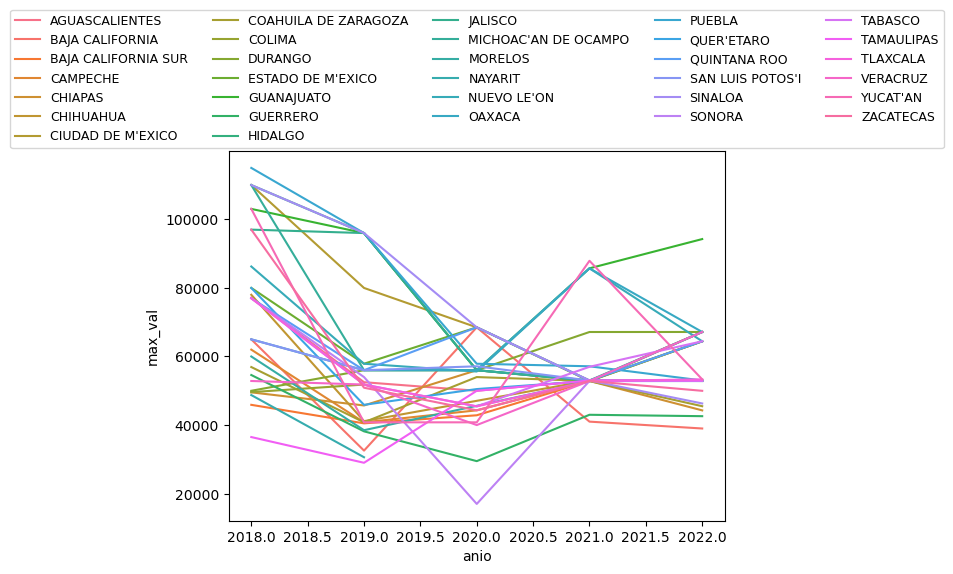

In [43]:
sns.lineplot(data=serie_tiempo_csv, x="anio", y="max_val", hue="estado")
plt.legend(loc='upper center', bbox_to_anchor=(.5, 1.4),
          ncol=5, fancybox=True, fontsize=9)
#plt.legend(loc='lower center', fontsize="5")